In [1]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout, Input
from keras.optimizers import Adam
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from keras.callbacks import ModelCheckpoint, EarlyStopping
import time
from keras.models import load_model

Using TensorFlow backend.
C:\Users\dibya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dibya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dibya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dibya\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
data_set_path = 'CK+_With_person_subfolder'
valid_path = 'valid'
train_path = 'train'
test_path = 'test'

In [3]:
def cnn_model(inp_shape, class_sz):
    model = Sequential()

    model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=inp_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=128,kernel_size=(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=256,kernel_size=(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(class_sz))
    model.add(Activation('softmax'))
    
    model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy']) 
    
    return model

In [4]:
def train_preprocess_img(img):
    data=[]
    img=img*255
    data.append(img)
    return(data)
def test_preprocess_img(img):
    data=[]
    img=img*255
    data.append(img)
    return(data)

In [5]:
train_batch_size=64
valid_batch_size=64
test_batch_size=1
sz=(48,48)
img_type= 'grayscale'
if img_type == 'grayscale':
    inp_shape=(sz[0],sz[1],1)
elif img_type == 'rgb':
    inp_shape=(sz[0],sz[1],3)
elif img_type == 'rgba':
    inp_shape=(sz[0],sz[1],4)
EPOCH=100
epochs_to_wait_for_improve=50

========================================   Fold 1   ==============================================
Found 729 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Found 99 images belonging to 6 classes.


Epoch 1/100
11/11 [==============================] - 2s 209ms/step - loss: 15.1480 - accuracy: 0.2301 - val_loss: 3.8671 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 3.86708, saving model to Best_model_for_epoch_1.h5
Epoch 2/100
11/11 [==============================] - 1s 52ms/step - loss: 3.8376 - accuracy: 0.3125 - val_loss: 1.9305 - val_accuracy: 0.5429

Epoch 00002: val_loss improved from 3.86708 to 1.93053, saving model to Best_model_for_epoch_1.h5
Epoch 3/100
11/11 [==============================] - 0s 40ms/step - loss: 1.7963 - accuracy: 0.3674 - val_loss: 1.4370 - val_accuracy: 0.5312

Epoch 00003: val_loss improved from 1.93053 to 1.43699, saving model to Best_model_for_epoch_1.h5
Epoch 4/100
11/11 [==============================] - 1s 4

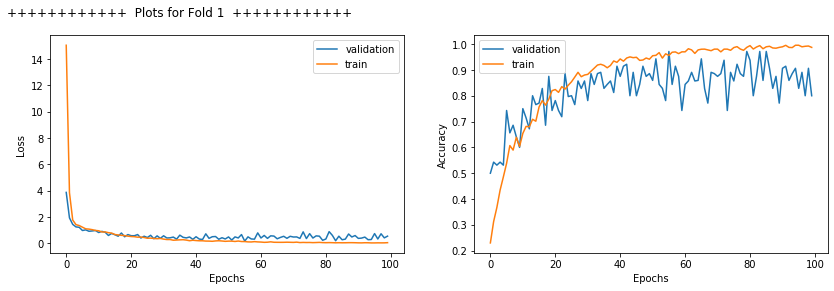

99/99 [==============================] - 0s 4ms/step
Confusion Matrix
[[12  0  0  0  3  0]
 [ 0 18  0  0  0  0]
 [ 0  0  6  0  0  3]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       1.00      1.00      1.00        18
           2       1.00      0.67      0.80         9
           3       1.00      1.00      1.00        21
           4       0.75      1.00      0.86         9
           5       0.90      1.00      0.95        27

    accuracy                           0.94        99
   macro avg       0.94      0.91      0.92        99
weighted avg       0.95      0.94      0.94        99

========================================   Fold 2   ==============================================
Found 729 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Epoch 1/100
11/11 [=====================

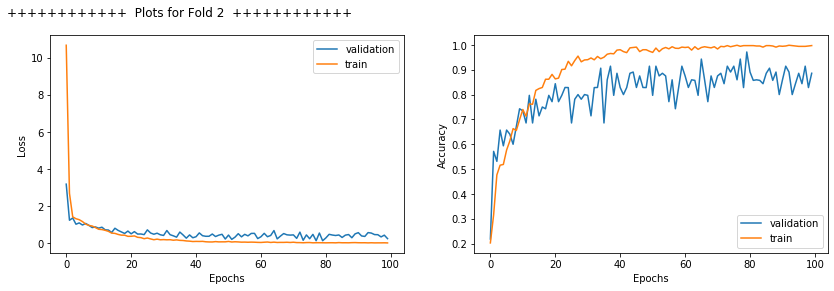

99/99 [==============================] - 0s 5ms/step
Confusion Matrix
[[15  0  0  0  0  0]
 [ 2 16  0  0  0  0]
 [ 0  0  3  3  0  3]
 [ 0  0  0 21  0  0]
 [ 3  2  0  0  3  1]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.89      0.89      0.89        18
           2       1.00      0.33      0.50         9
           3       0.88      1.00      0.93        21
           4       1.00      0.33      0.50         9
           5       0.87      1.00      0.93        27

    accuracy                           0.86        99
   macro avg       0.90      0.76      0.77        99
weighted avg       0.88      0.86      0.83        99

========================================   Fold 3   ==============================================
Found 732 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Epoch 1/100
11/11 [=====================

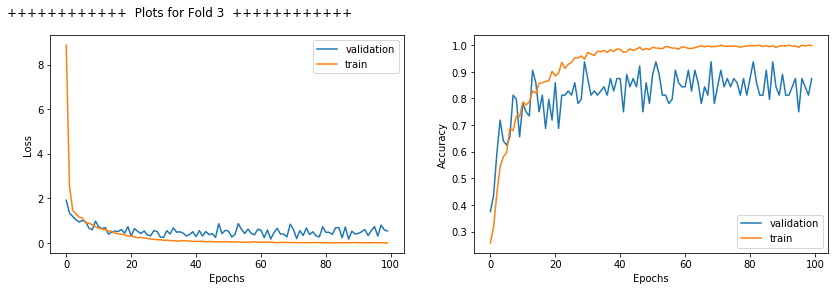

99/99 [==============================] - 1s 5ms/step
Confusion Matrix
[[ 9  6  0  0  0  0]
 [ 1 17  0  0  0  0]
 [ 3  0  6  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  2  0  0  4  3]
 [ 0  0  0  0  0 27]]
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.68      0.94      0.79        18
           2       1.00      0.67      0.80         9
           3       1.00      1.00      1.00        21
           4       1.00      0.44      0.62         9
           5       0.90      1.00      0.95        27

    accuracy                           0.85        99
   macro avg       0.88      0.78      0.80        99
weighted avg       0.87      0.85      0.84        99

========================================   Fold 4   ==============================================
Found 735 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Epoch 1/100
11/11 [=====================

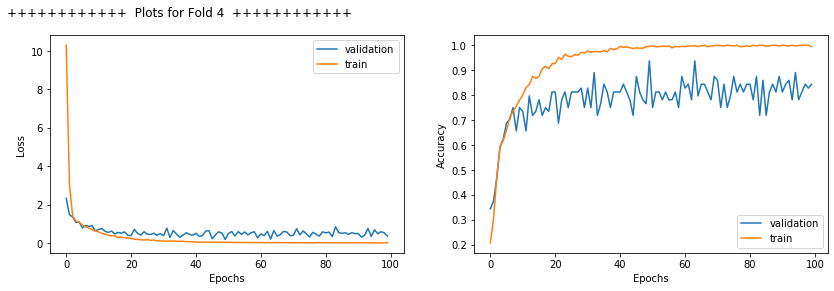

96/96 [==============================] - 1s 7ms/step
Confusion Matrix
[[12  0  0  0  0  3]
 [ 0 18  0  0  0  0]
 [ 1  1  0  5  0  2]
 [ 0  0  0 21  0  0]
 [ 3  0  0  0  6  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.95      1.00      0.97        18
           2       0.00      0.00      0.00         9
           3       0.81      1.00      0.89        21
           4       1.00      0.67      0.80         9
           5       0.83      1.00      0.91        24

    accuracy                           0.84        96
   macro avg       0.72      0.74      0.72        96
weighted avg       0.77      0.84      0.80        96

========================================   Fold 5   ==============================================


C:\Users\dibya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Found 741 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Epoch 1/100
11/11 [==============================] - 1s 108ms/step - loss: 9.3794 - accuracy: 0.2275 - val_loss: 2.4179 - val_accuracy: 0.4688

Epoch 00001: val_loss improved from inf to 2.41792, saving model to Best_model_for_epoch_5.h5
Epoch 2/100
11/11 [==============================] - 1s 54ms/step - loss: 2.8594 - accuracy: 0.3456 - val_loss: 1.6636 - val_accuracy: 0.3846

Epoch 00002: val_loss improved from 2.41792 to 1.66362, saving model to Best_model_for_epoch_5.h5
Epoch 3/100
11/11 [==============================] - 0s 45ms/step - loss: 1.6649 - accuracy: 0.3878 - val_loss: 1.3602 - val_accuracy: 0.7188

Epoch 00003: val_loss improved from 1.66362 to 1.36022, saving model to Best_model_for_epoch_5.h5
Epoch 4/100
11/11 [==============================] - 0s 43ms/step - loss: 1.3788 - accuracy: 0.4985 - val_loss: 1.3446 - val_accuracy: 0.6154

Epoch 00004: val

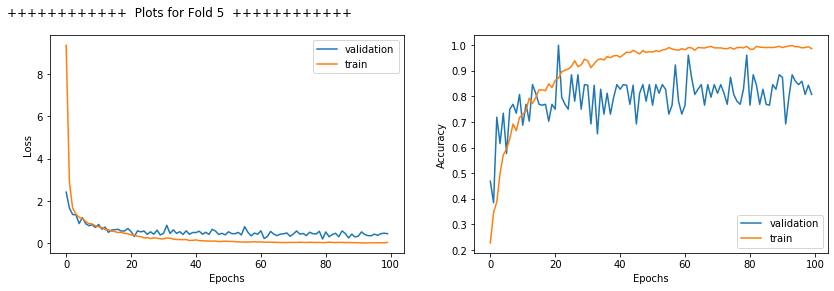

96/96 [==============================] - 1s 7ms/step
Confusion Matrix
[[12  3  0  0  0  0]
 [ 3 10  0  5  0  0]
 [ 3  0  3  0  0  3]
 [ 0  0  0 21  0  0]
 [ 3  0  0  0  6  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        15
           1       0.77      0.56      0.65        18
           2       1.00      0.33      0.50         9
           3       0.81      1.00      0.89        21
           4       1.00      0.67      0.80         9
           5       0.89      1.00      0.94        24

    accuracy                           0.79        96
   macro avg       0.84      0.73      0.74        96
weighted avg       0.82      0.79      0.78        96

========================================   Fold 6   ==============================================
Found 747 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/100
11/11 [=====================

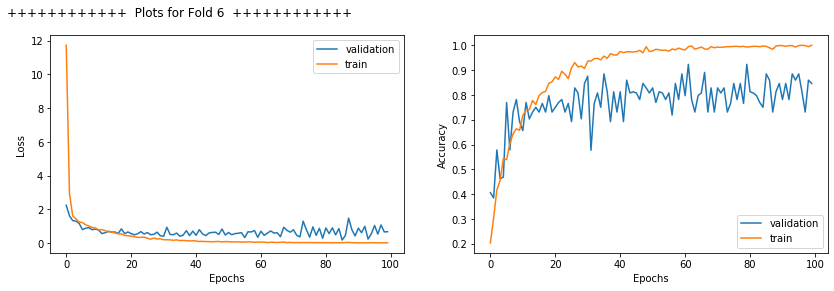

90/90 [==============================] - 1s 9ms/step
Confusion Matrix
[[10  0  0  0  0  2]
 [ 0 18  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0 21  0  0]
 [ 6  0  0  0  0  3]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        21
           4       0.00      0.00      0.00         9
           5       0.83      1.00      0.91        24

    accuracy                           0.88        90
   macro avg       0.74      0.81      0.77        90
weighted avg       0.80      0.88      0.84        90

========================================   Fold 7   ==============================================


C:\Users\dibya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Found 747 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/100
11/11 [==============================] - 1s 108ms/step - loss: 13.1191 - accuracy: 0.2064 - val_loss: 2.6328 - val_accuracy: 0.2969

Epoch 00001: val_loss improved from inf to 2.63282, saving model to Best_model_for_epoch_7.h5
Epoch 2/100
11/11 [==============================] - 1s 51ms/step - loss: 3.7843 - accuracy: 0.2621 - val_loss: 1.5005 - val_accuracy: 0.3846

Epoch 00002: val_loss improved from 2.63282 to 1.50053, saving model to Best_model_for_epoch_7.h5
Epoch 3/100
11/11 [==============================] - 1s 47ms/step - loss: 1.7243 - accuracy: 0.3734 - val_loss: 1.2367 - val_accuracy: 0.7500

Epoch 00003: val_loss improved from 1.50053 to 1.23667, saving model to Best_model_for_epoch_7.h5
Epoch 4/100
11/11 [==============================] - 1s 47ms/step - loss: 1.4007 - accuracy: 0.4963 - val_loss: 1.2190 - val_accuracy: 0.6923

Epoch 00004: va

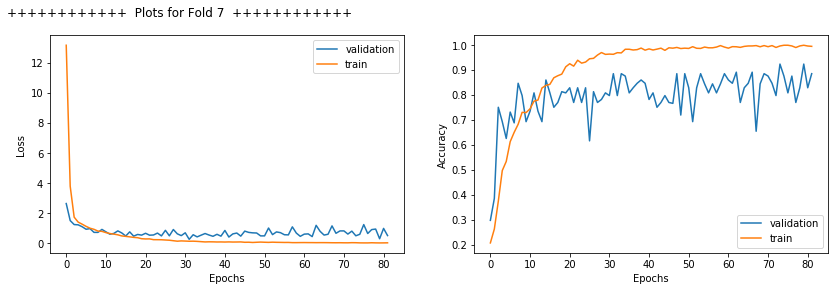

90/90 [==============================] - 1s 9ms/step
Confusion Matrix
[[ 1  4  0  2  4  1]
 [ 0 18  0  0  0  0]
 [ 0  0  4  1  0  1]
 [ 0  0  0 21  0  0]
 [ 0  0  6  0  3  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.82      1.00      0.90        18
           2       0.40      0.67      0.50         6
           3       0.88      1.00      0.93        21
           4       0.43      0.33      0.38         9
           5       0.92      1.00      0.96        24

    accuracy                           0.79        90
   macro avg       0.74      0.68      0.64        90
weighted avg       0.82      0.79      0.75        90

========================================   Fold 8   ==============================================
Found 750 images belonging to 6 classes.
Found 87 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/100
11/11 [=====================

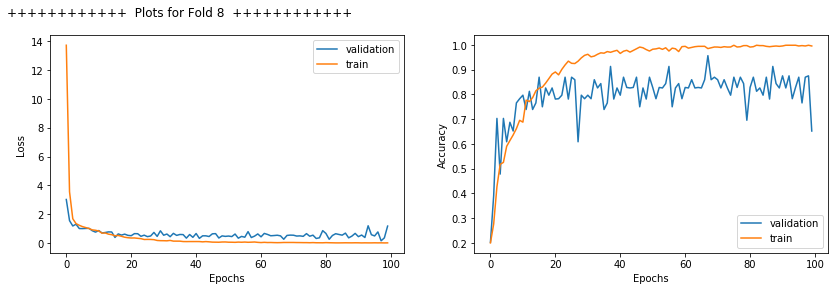

90/90 [==============================] - 1s 10ms/step
Confusion Matrix
[[ 3  0  0  0  9  0]
 [ 0 18  0  0  0  0]
 [ 3  0  3  0  0  0]
 [ 0  0  0 21  0  0]
 [ 3  0  0  0  3  3]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       1.00      1.00      1.00        18
           2       1.00      0.50      0.67         6
           3       1.00      1.00      1.00        21
           4       0.25      0.33      0.29         9
           5       0.89      1.00      0.94        24

    accuracy                           0.80        90
   macro avg       0.75      0.68      0.70        90
weighted avg       0.81      0.80      0.80        90

========================================   Fold 9   ==============================================
Found 759 images belonging to 6 classes.
Found 81 images belonging to 6 classes.
Found 87 images belonging to 6 classes.
Epoch 1/100
11/11 [====================

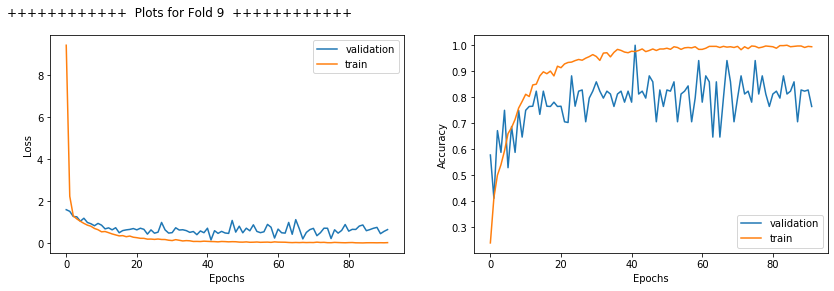

87/87 [==============================] - 1s 12ms/step
Confusion Matrix
[[ 9  0  0  3  0  0]
 [ 1 17  0  0  0  0]
 [ 1  0  5  0  0  0]
 [ 0  0  0 21  0  0]
 [ 1  0  0  0  5  0]
 [ 3  0  1  0  0 20]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       1.00      0.94      0.97        18
           2       0.83      0.83      0.83         6
           3       0.88      1.00      0.93        21
           4       1.00      0.83      0.91         6
           5       1.00      0.83      0.91        24

    accuracy                           0.89        87
   macro avg       0.88      0.87      0.87        87
weighted avg       0.90      0.89      0.89        87

========================================   Fold 10   ==============================================
Found 747 images belonging to 6 classes.
Found 99 images belonging to 6 classes.
Found 81 images belonging to 6 classes.
Epoch 1/100
11/11 [===================

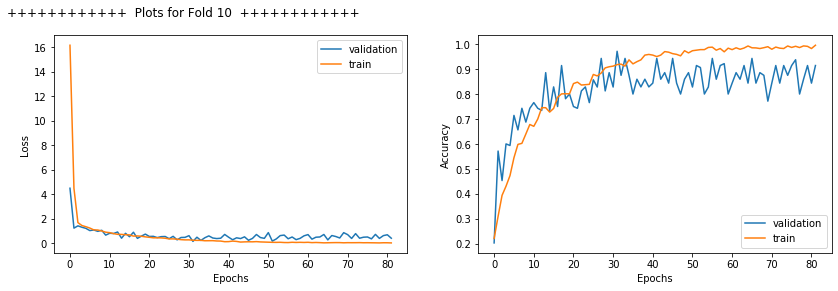

81/81 [==============================] - 1s 13ms/step
Confusion Matrix
[[10  0  0  0  2  0]
 [ 0 12  0  3  0  0]
 [ 0  0  0  0  0  6]
 [ 0  0  0 18  0  0]
 [ 3  0  0  0  3  0]
 [ 0  0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       1.00      0.80      0.89        15
           2       0.00      0.00      0.00         6
           3       0.86      1.00      0.92        18
           4       0.60      0.50      0.55         6
           5       0.80      1.00      0.89        24

    accuracy                           0.83        81
   macro avg       0.67      0.69      0.67        81
weighted avg       0.77      0.83      0.79        81



C:\Users\dibya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
cv=KFold(n_splits=10)
classes = os.listdir(data_set_path)
person_perclass = []
for c in classes:
    l=os.listdir(data_set_path+'/'+c)
    l=np.array(l)
    temp=[]
    for train_index, test_index in cv.split( X=l):
        temp.append(l[test_index])
    person_perclass.append(temp)
a=np.arange(0,10,1)
b=np.arange(0,10,1)
c=(b+1)%10
conf_foldwise = []
accuracy_foldwise = []
error_foldwise = []
actual_out = []
predict_out = []
training_time_per_epoch=[]
testing_time_per_epoch=[]
for i in range(10):
    print('===================================================================================================')
    print('========================================   Fold '+str(i+1)+'   ==============================================')
    print('===================================================================================================')
    model_name = 'Best_model_for_epoch_'+str(i+1)
    d=np.array([l for l in a if l not in [b[i], c[i]]])
    if not os.path.isdir(train_path):
        os.mkdir(train_path)
    else:
        shutil.rmtree(train_path)
        os.mkdir(train_path)

    if not os.path.isdir(test_path):
        os.mkdir(test_path)
    else:
        shutil.rmtree(test_path)
        os.mkdir(test_path)

    if not os.path.isdir(valid_path):
        os.mkdir(valid_path)
    else:
        shutil.rmtree(valid_path)
        os.mkdir(valid_path)
    for j in range(len(classes)):
        l = person_perclass[j][b[i]]
        if not os.path.isdir(test_path+'/'+classes[j]):
            os.mkdir(test_path+'/'+classes[j])
        for k in l:
            filelist = []
            [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
            for f in filelist:
                img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                data  = test_preprocess_img(img)
                for ix in range(len(data)):
                    cv2.imwrite(test_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])
    for j in range(len(classes)):
        l = person_perclass[j][c[i]]
        if not os.path.isdir(valid_path+'/'+classes[j]):
            os.mkdir(valid_path+'/'+classes[j])
        for k in l:
            filelist = []
            [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
            for f in filelist:
                img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                data  = test_preprocess_img(img)
                for ix in range(len(data)):
                    cv2.imwrite(valid_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])
    for j in range(len(classes)):
        for jj in range(d.shape[0]):
            l = person_perclass[j][d[jj]]
            if not os.path.isdir(train_path+'/'+classes[j]):
                os.mkdir(train_path+'/'+classes[j])
            for k in l:
                filelist = []
                [filelist.append(file) for file in os.listdir(data_set_path+'/'+classes[j]+'/'+k) if file.endswith('.png')]
                for f in filelist:
                    img=plt.imread(data_set_path+'/'+classes[j]+'/'+k+'/'+f)
                    data  = test_preprocess_img(img)
                    for ix in range(len(data)):
                        cv2.imwrite(train_path+'/'+classes[j]+'/im_'+str(ix)+'_'+f,data[ix])
    datagen = ImageDataGenerator()
    train_generator = datagen.flow_from_directory(train_path, class_mode='categorical', batch_size=train_batch_size, target_size=sz,color_mode=img_type, shuffle=True)
    valid_generator = datagen.flow_from_directory(valid_path, class_mode='categorical', batch_size=valid_batch_size, target_size=sz,color_mode=img_type, shuffle=True)
    test_generator = datagen.flow_from_directory(test_path, class_mode='categorical', batch_size=test_batch_size, target_size=sz, color_mode=img_type,  shuffle=False)
    
    class_size=len(np.unique(train_generator.classes))
    model = cnn_model(inp_shape, class_size)

    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
    
    
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=epochs_to_wait_for_improve)
    checkpoint_callback = ModelCheckpoint(model_name+'.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    start_time = time.time()
    history=model.fit_generator(generator=train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=valid_generator,
                        validation_steps=STEP_SIZE_VALID,
                        epochs=EPOCH, callbacks=[early_stopping_callback, checkpoint_callback]
    )
    end_time = time.time()
    training_time_per_epoch.append(end_time-start_time)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('++++++++++++  Plots for Fold '+str(i+1) +'  ++++++++++++')
    plt.subplots_adjust(left=0.2, bottom=None, right=2, top=None, wspace=None, hspace=None)
    ax1.plot(history.history['val_loss'])
    ax1.plot(history.history['loss'])
    ax1.legend(['validation','train'])
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.plot(history.history['val_accuracy'])
    ax2.plot(history.history['accuracy'])
    ax2.legend(['validation','train'])
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    plt.show()
    saved_model = load_model(model_name+'.h5')
    STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
    test_generator.reset()
    start_time = time.time()
    pred=model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
    end_time = time.time()
    testing_time_per_epoch.append(end_time-start_time)
    accuracy_foldwise.append(pred[1])
    error_foldwise.append(pred[0])
    test_generator.reset()
    pred=model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)
    pred_l = np.argmax(pred, axis=1)
    print('Confusion Matrix')
    conf = confusion_matrix(test_generator.classes, pred_l)
    print(conf)
    print(classification_report(test_generator.classes, pred_l))
    conf_foldwise.append(conf)
    actual_out.append(test_generator.classes)
    predict_out.append(pred)

In [7]:
print('Average accuracy : {}'.format(np.mean(accuracy_foldwise)))
print('Average training time per epoch : {}'.format(np.mean(training_time_per_epoch)))
print('Average testing time per epoch : {}'.format(np.mean(testing_time_per_epoch)))

Average accuracy : 0.8460765898227691
Average training time per epoch : 52.73573632240296
Average testing time per epoch : 0.5059034109115601
